<a href="https://colab.research.google.com/github/Samuel-Mason-git/Recent-Projects/blob/main/CNN_Computer_Vision_Binary_Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d tongpython/cat-and-dog
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall()
    zip_ref.close()

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 99% 215M/218M [00:10<00:00, 23.2MB/s]
100% 218M/218M [00:10<00:00, 21.2MB/s]


## Understand the data we have
1. How many treaining images do we have?
2. How many testing images do we have?
3. How many classes are there?

In [2]:
import os
import numpy as np
import pathlib

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/test_set"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

for dirpath, dirnames, filenames in os.walk("/content/training_set"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

data_dir = pathlib.Path('/content/training_set/training_set')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories

print(f"\nThere are a total of {len(class_names)} classes: {class_names}")

There are 1 directories and 0 images in '/content/test_set'.
There are 2 directories and 0 images in '/content/test_set/test_set'.
There are 0 directories and 1013 images in '/content/test_set/test_set/dogs'.
There are 0 directories and 1012 images in '/content/test_set/test_set/cats'.
There are 1 directories and 0 images in '/content/training_set'.
There are 2 directories and 0 images in '/content/training_set/training_set'.
There are 0 directories and 4006 images in '/content/training_set/training_set/dogs'.
There are 0 directories and 4001 images in '/content/training_set/training_set/cats'.

There are a total of 2 classes: ['cats' 'dogs']


### Visualise some images to gain an understanding of the images shapes and content

In [3]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (499, 319, 3)


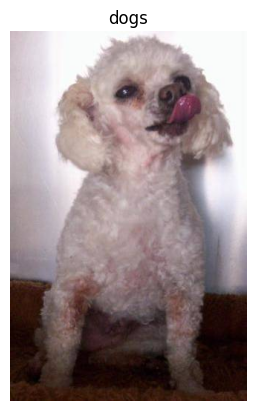

In [4]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/test_set/test_set/",
                        target_class="dogs")

## Creating our Tiny VGG CNN model
1. Pass the images through a transformer to turn them into normalised tensors for the model
2. Create and define our CNN in Tiny VGG architecture
3. Compile our model
4. Fit our model
5. Define our plot_loss_curves function to plot the individual validation and training metrics

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/content/training_set/training_set"
test_dir = "/content/test_set/test_set"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# A tiny VGG model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

model_1.summary()

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/5
251/251 [==============================] - 34s 102ms/step - loss: 0.6653 - accuracy: 0.5700 - val_loss: 0.6207 - val_accuracy: 0.6510
Epoch 2/5
251/251 [==============================] - 25s 100ms/step - loss: 0.5749 - accuracy: 0.7012 - val_loss: 0.5524 - val_accuracy: 0.7000
Epoch 3/5
251/251 [==============================] - 24s 96ms/step - loss: 0.4727 - accuracy: 0.7761 - val_loss: 0.5440 - val_accuracy: 0.7261
Epoch 4/5
251/251 [==============================] - 26s 103ms/step - loss: 0.3855 - accuracy: 0.8254 - val_loss: 0.6144 - val_accuracy: 0.7148
Epoch 5/5
251/251 [==============================] - 26s 102ms/step - loss: 0.2912 - accuracy: 0.8763 - val_loss: 0.6609 - val_accuracy: 0.7207
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222,

In [6]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

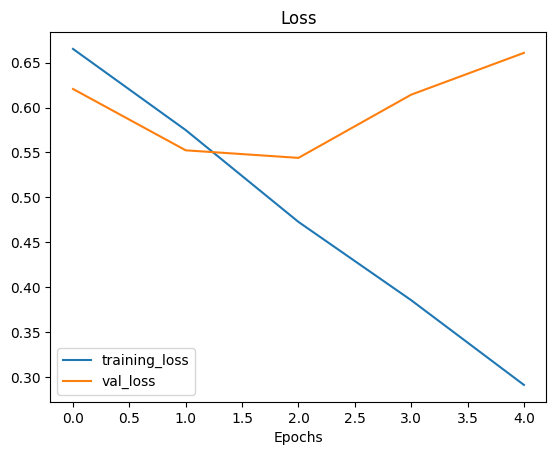

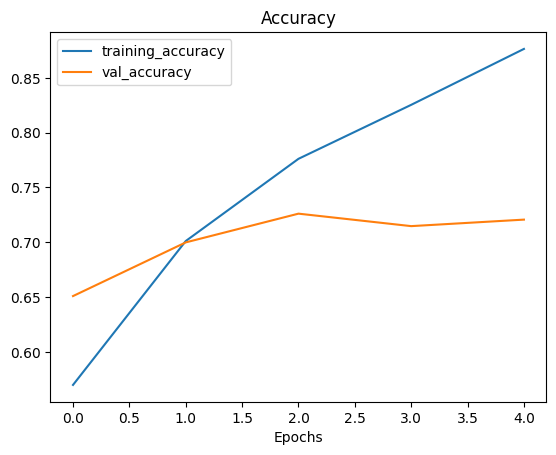

In [7]:
plot_loss_curves(history_1)


## Augmenting the images to improve performance

In [8]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=10, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=False) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 8005 images belonging to 2 classes.
Non-augmented training images:
Found 8005 images belonging to 2 classes.
Unchanged test images:
Found 2023 images belonging to 2 classes.


In [9]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

### Random Image vs Augmented Image

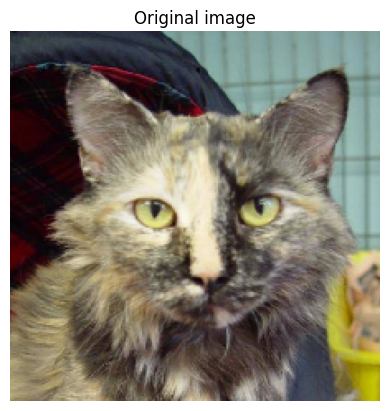

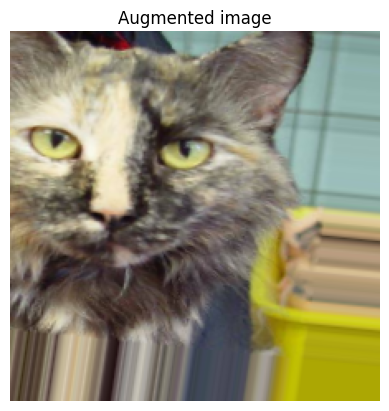

In [10]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

## Model using Augmented Data to combat overfitting

In [11]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 8005 images belonging to 2 classes.


In [12]:
# Model one repeated but utilising augmented data with 32 filters per Conv2D layer
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_1.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

model_2.summary()

Epoch 1/5
251/251 [==============================] - 113s 450ms/step - loss: 0.6042 - accuracy: 0.6777 - val_loss: 0.5629 - val_accuracy: 0.7173
Epoch 2/5
251/251 [==============================] - 114s 455ms/step - loss: 0.5632 - accuracy: 0.7092 - val_loss: 0.4987 - val_accuracy: 0.7563
Epoch 3/5
251/251 [==============================] - 112s 445ms/step - loss: 0.5614 - accuracy: 0.7088 - val_loss: 0.4820 - val_accuracy: 0.7588
Epoch 4/5
251/251 [==============================] - 112s 446ms/step - loss: 0.5523 - accuracy: 0.7200 - val_loss: 0.4989 - val_accuracy: 0.7588
Epoch 5/5
251/251 [==============================] - 110s 440ms/step - loss: 0.5339 - accuracy: 0.7324 - val_loss: 0.4560 - val_accuracy: 0.7810
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                       

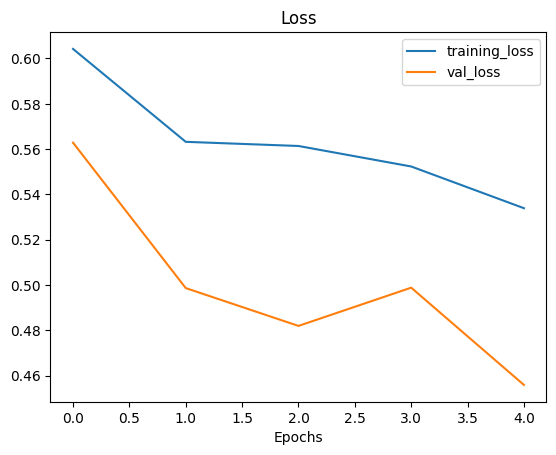

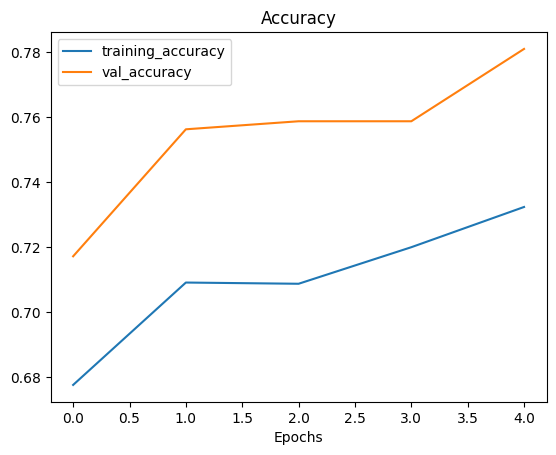

In [13]:
plot_loss_curves(history_2)

## Predicting with our model

In [14]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [15]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)
  print(class_names)
  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 1s 673ms/step
[[0.51865476]]
['cats' 'dogs']


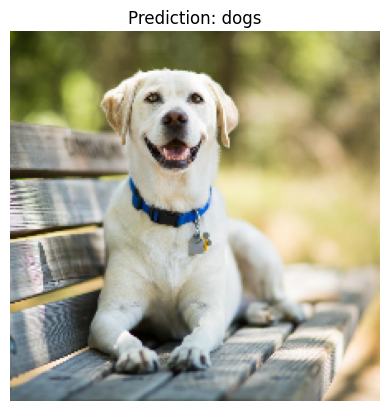

In [18]:
pred_and_plot(model_2, '/content/gettyimages-530330473.jpg', class_names)